In [5]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib import rcParams

#======================多目标规划问题======================#
# 两个目标函数的权重以及对应的x1,x2的值
weights=[
    (0.4,0.6),
    (0.5,0.5),
    (0.3,0.7),
]

# 定义约束条件
A=[[-1,-1]]
b=[-7]
lb=[0,0]
ub=[5,6]
bounds=[(lb[0],ub[0]),(lb[1],ub[1])]

# 遍历不同权重组合,求解线性规划
for w1,w2 in weights:
    # 构造目标函数系数
    c=[w1/30*2+w2/2*0.4,w1/30*5+w2/2*0.3]

    # 求解线性规划
    result=linprog(c,A_ub=A,b_ub=b,bounds=bounds,method='highs')
    x=result.x
    fval=result.fun

    # 计算目标函数值
    f1=2*x[0]+5*x[1]
    f2=0.4*x[0]+0.3*x[1]

    # 打印结果
    print(f"\n权重组合:w1={w1},w2={w2}")
    print(f"最优解:x1={x[0]:.2f},x2={x[1]:.2f}")
    print(f"目标函数值:f1={f1:.2f},f2={f2:.2f},综合指标={fval:.2f}")






权重组合:w1=0.4,w2=0.6
最优解:x1=5.00,x2=2.00
目标函数值:f1=20.00,f2=2.60,综合指标=1.05

权重组合:w1=0.5,w2=0.5
最优解:x1=5.00,x2=2.00
目标函数值:f1=20.00,f2=2.60,综合指标=0.98

权重组合:w1=0.3,w2=0.7
最优解:x1=1.00,x2=6.00
目标函数值:f1=32.00,f2=2.20,综合指标=1.09


C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py

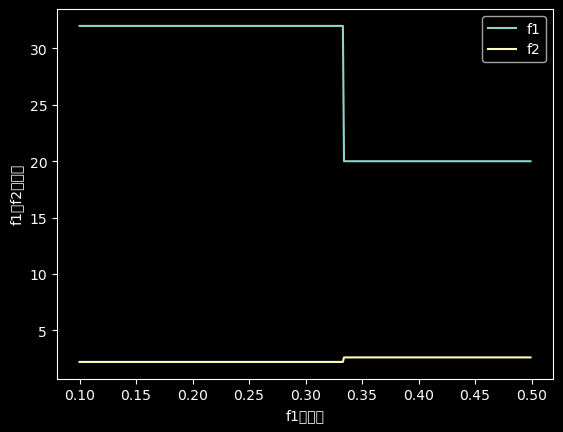

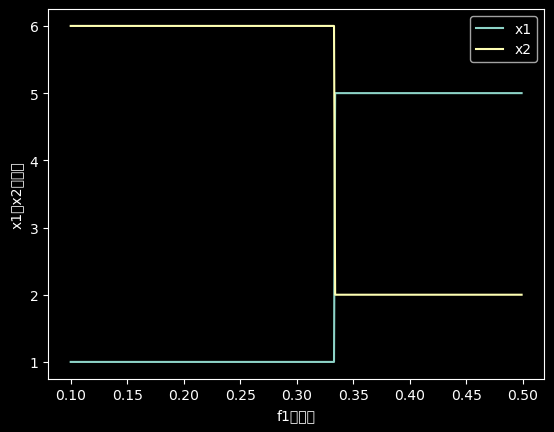

C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32508 (\N{CJK UNIFIED IDEOGRAPH-7EFC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\34099\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


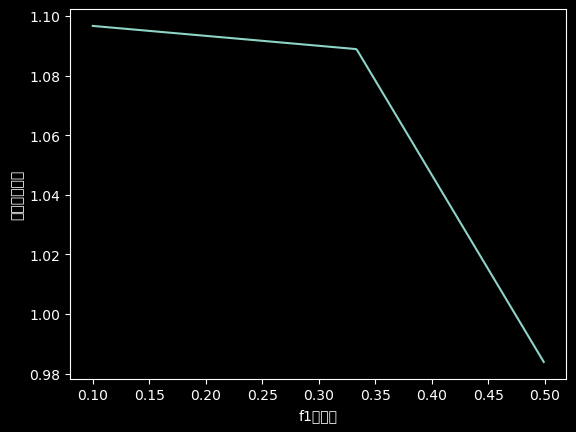

In [8]:
# 敏感性分析

import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# 敏感性分析
W1 = np.arange(0.1, 0.5, 0.001)
W2 = 1 - W1
n = len(W1)
F1 = np.zeros(n)
F2 = np.zeros(n)
X1 = np.zeros(n)
X2 = np.zeros(n)
FVAL = np.zeros(n)
A = [[-1, -1]]
b = [-7]
lb = [0, 0]
ub = [5, 6]

for i in range(n):
    w1 = W1[i]
    w2 = W2[i]
    c = [w1/30*2 + w2/2*0.4, w1/30*5 + w2/2*0.3]
    res = linprog(c, A_ub=A, b_ub=b, bounds=[(lb[0], ub[0]), (lb[1], ub[1])], method='highs')
    x = res.x
    fval = res.fun
    F1[i] = 2 * x[0] + 5 * x[1]
    F2[i] = 0.4 * x[0] + 0.3 * x[1]
    X1[i] = x[0]
    X2[i] = x[1]
    FVAL[i] = fval

# 绘制图形
plt.figure(1)
plt.plot(W1, F1, label='f1')
plt.plot(W1, F2, label='f2')
plt.xlabel('f1的权重')
plt.ylabel('f1和f2的取值')
plt.legend()

plt.figure(2)
plt.plot(W1, X1, label='x1')
plt.plot(W1, X2, label='x2')
plt.xlabel('f1的权重')
plt.ylabel('x1和x2的取值')
plt.legend()

plt.figure(3)
plt.plot(W1, FVAL)
plt.xlabel('f1的权重')
plt.ylabel('综合指标的值')
plt.show()
